In [4]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import scale 


In [2]:
!pip install scikit-plot 

You are using pip version 19.0.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
from scikitplot.metrics import plot_roc, plot_confusion_matrix 
from warnings import filterwarnings 
filterwarnings("ignore") 

In [12]:
# X File Read in Pandas 
NeurFeat = pd.read_csv("../data/Merged/merged_DevAttentionX.csv") 
NeurFeat.drop(list(NeurFeat.columns)[0], axis=1, inplace=True)
print(NeurFeat.shape)

(126082, 189)


In [13]:
# Y File Read in Pandas 
ClassValues = pd.read_csv("../data/Merged/merged_DevAttentionY.csv") 
ClassValues.drop(list(ClassValues.columns)[0], axis=1, inplace=True) 
print(ClassValues.shape) 

(126082, 1)


In [14]:
NeurFeatExp = NeurFeat.loc[0:119999] 
ClassValuesExp = ClassValues.loc[0:119999] 

ZFeatures = scale(NeurFeatExp, axis=0) 
# Creating Training and Testing Sets 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(ZFeatures, ClassValuesExp, test_size=0.2, random_state=100)

# Create the validation sets 
Xtrain2, XVal, Ytrain2, YVal = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=100) 



In [15]:
# Linear Discriminant Analysis 

model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto') 
model_fit = model.fit(Xtrain2, Ytrain2) 
test_pred_prob = model_fit.predict_proba(Xtest) 
test_pred = model_fit.predict(Xtest) 



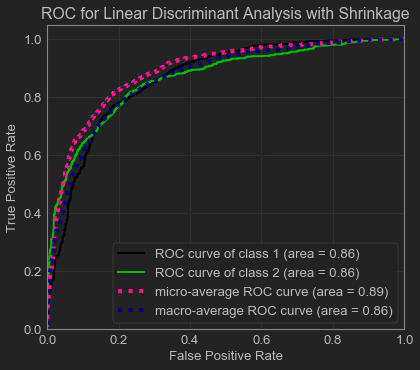

In [20]:
# Creating Our Graphs 

from jupyterthemes import jtplot

jtplot.style(theme='monokai') 


plot_roc(Ytest, test_pred_prob, title="ROC for Linear Discriminant Analysis with Shrinkage") 

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

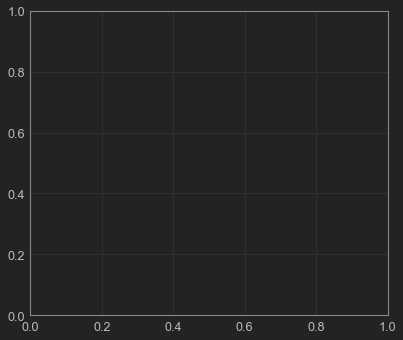

In [21]:
plot_confusion_matrix(Ytest, test_pred_prob) 